In [14]:
import Functions as voidsframework
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from cobaya import run
import os

Let's define our cosmological model (the parameters of our simulation box)

In [2]:
omega_m = 0.3089  ##matter density
omega_l = 1-omega_m ##dark energy density
n=3e-3  ##halo number density
sigma8=0.8159 ##sigma8
omega_c = 0.258896  ##cold dark matter density
h = 0.6774 ##reduced hubble constant, H0=100*h
z = 0.092 ##redshift of the simulation box
space = True ##real space
vol = 2000**3 ##volume of the simulation in units of (Mpc/h)**3

First step: Calculating the mass

In [4]:
def fun(params):
    msubg = params
    model = voidsframework.CosmologyModel(omega_l, omega_m, omega_c,  sigma8, h, msubg, n, z, space)
    rad = np.arange(14, 22, 1)
    funuchuu = model.P0(rad)
    funuchuunvoids = model.nvoids(rad)
    probuchuu = np.array([1.884e-3, 7.423e-4, 2.775e-4, 9.863e-5, 3.421e-5, 1.017e-5, 2.958e-6, 1.125e-6])
    nvoidsuchuu = np.array([40669, 21770, 10605, 4732, 1926, 740, 243, 69])

    rvoids = []

    input_path = 'Uchuu_voids.txt'
    xi, yi, zi, rvoids = np.loadtxt(input_path, unpack=True)

    rvoids = np.array(rvoids)
    rvoids = rvoids[rvoids>14]
    rbarra=np.mean(rvoids)


    errorP0 = np.sqrt(model.rmsP0(funuchuu, funuchuunvoids, rbarra, nvoidsuchuu, 24000000))

    chi2 = 0
    for i in range(len(probuchuu)):
        b = (funuchuu[i]-probuchuu[i])**2
        chi2 = chi2 + b/(errorP0[i]**2)
    print(msubg, chi2)
    return chi2


x0 = [4.74]

res = minimize(fun, x0, bounds=[(1,10)])

print()
print('msubg:', res.x, 'chi2 value: ', res.fun)



[4.74] 9.228526272083512
[4.74000001] 9.228526410701114
[1.] 156595.7223317671
[1.00000001] 156595.718578991
[3.67207256] 908.2621938487082
[3.67207257] 908.2621715504454
[4.72478174] 9.125671920655934
[4.72478175] 9.12567191671951
[4.72520197] 9.125590051109189
[4.72520198] 9.12559005114892
[4.72519777] 9.125590042793787
[4.72519778] 9.125590042793863

msubg : [4.72519777] chi2 value:  9.125590042793787


The mass obtained is msubg=4.73. Let's use this mass to calculate the VPF and nvoids from Uchuu!

[3.63714093e-04 2.32050137e-04 1.43089213e-04 8.57336937e-05
 5.02476040e-05 2.88535817e-05 1.63263697e-05 9.16925680e-06
 5.08848012e-06 2.79036364e-06 1.48912276e-06 8.02616636e-07
 4.33861004e-07]


Text(0.5, 0, 'r $[h^{-1}Mpc]$')

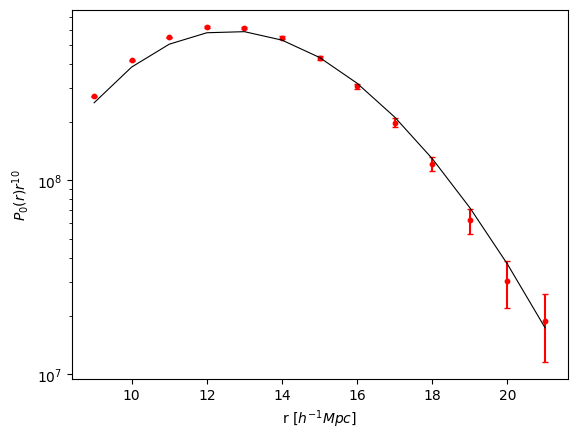

In [5]:
msubg = 4.73

model = voidsframework.CosmologyModel(omega_l, omega_m, omega_c,  sigma8, h, msubg, n, z, space)

rad = np.arange(9, 22, 1)
vpf = model.P0(rad) 
nvoids = model.nvoids(rad) 

vpfuchuu = np.array([7.782e-2, 4.176e-2, 2.106e-2, 9.98e-3, 4.452e-3, 1.884e-3, 7.423e-4, 2.775e-4, 9.863e-5, 3.421e-5, 1.017e-5, 2.958e-6, 1.125e-6])
nvoidsuchuu = np.array([369844, 260015, 176682, 114872, 70483, 40669, 21770, 10605, 4732, 1926, 740, 243, 69])

err = model.rmsP0(vpf, nvoids, 15, nvoidsuchuu, 24000000)
err = np.sqrt(err)
print(err)

plt.scatter(rad, vpfuchuu*(rad**10), c='red', s=10)
plt.errorbar(rad, vpfuchuu*(rad**10), yerr=err*(rad**10), c='red', fmt='o', markersize=0, capsize=2,)

plt.plot(rad, vpf*(rad**10), c='black', linewidth=0.8)

plt.yscale('log')
plt.ylabel(r'$P_{0}(r)r^{10}$')
plt.xlabel(r'r $[h^{-1}Mpc]$')

Text(0.5, 0, 'r $[h^{-1}Mpc]$')

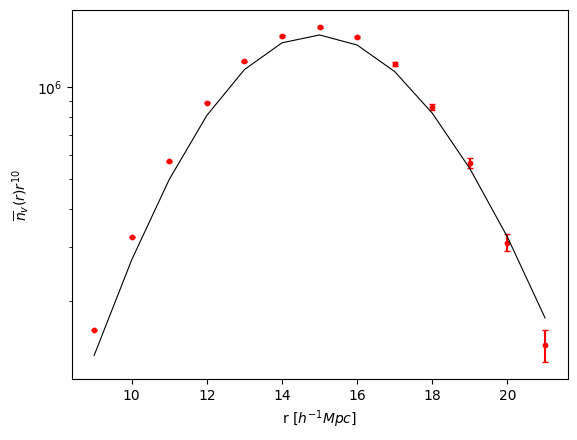

In [6]:
msubg = 4.73

model = voidsframework.CosmologyModel(omega_l, omega_m, omega_c,  sigma8, h, msubg, n, z, space)

rad = np.arange(9, 22, 1)
nvoids = model.nvoids(rad) 

nvoidsuchuu = np.array([369844, 260015, 176682, 114872, 70483, 40669, 21770, 10605, 4732, 1926, 740, 243, 69])


plt.scatter(rad, nvoidsuchuu*(rad**10)/vol, c='red', s=10)
plt.errorbar(rad, nvoidsuchuu*(rad**10)/vol, yerr=np.sqrt(nvoidsuchuu)*(rad**10)/vol, c='red', fmt='o', markersize=0, capsize=2,)

plt.plot(rad, nvoids*(rad**10), c='black', linewidth=0.8)

plt.yscale('log')
plt.ylabel(r'$\overline{n}_{v}(r)r^{10}$')
plt.xlabel(r'r $[h^{-1}Mpc]$')

Cosmological inferences with Cobaya for Uchuu-SDSS voids

In [10]:
def likelihood(sigma8, omegam, h):
    L = 0
    sim = [24, 12, 8, 6, 0, 0]
    msubg = 4.73
    n=112496/39.03e6
    omegac = (1-0.157374735356387)*omegam
    model = voidsframework.CosmologyModel(1-omegam, omegam, h*omegac,  sigma8, h, msubg, n, 0.105077, False)
    rad = np.arange(16,23,1)
    nvoids = model.nvoids(rad)
    for k in range(6):
        pred = nvoids[k]
        rms = np.sqrt(pred)
        alfa = 0.5 * ((sim[k] - pred) / rms) ** 2
        L = L - np.log(rms) - alfa
    #print(sigma8, gamma, L)
    return L

def get_s8(sigma8, omegam):
    return sigma8*np.sqrt(omegam/0.3)

def get_H0(h):
    return 100*h

def get_gamma(omegam, h):
   return omegam*h


In [ ]:
info = {'likelihood':{'juan':likelihood}}

info["params"] = {
    "sigma8": {"latex":r"\sigma_{8}" ,"prior": {"min": 0.5, "max": 1.4},  "proposal": 0.8159},
    "omegam": {"latex":r"\Omega_{m}" ,"prior": {"min": 0.15, "max": 0.5}, "proposal": 0.3089},
    "h": {"prior": {"min": 0.4, "max": 1.4}, "proposal": 0.6774}}


info["params"]["S8"] = {"derived": get_s8, "latex":r"S_{8}"}
info["params"]["H0"] = {"derived": get_H0, "latex":r"H_{0}"}
info["params"]["gamma"] = {"derived": get_gamma, "latex":r"\gamma"}


info["sampler"] = {"mcmc": {"Rminus1_stop": 0.01, "max_tries":5000}}
info["output"] = 'SDSS/SDSS'
info["resume"] = True ##Set to true so you can resume whenever you want to!

updated_info, sampler = run(info)

Let's analyze now the chains!

In [23]:
from getdist import plots, MCSamples

tempdir = os.getcwd()

g = plots.get_single_plotter(chain_dir=tempdir, 
            analysis_settings={'ignore_rows': 0.3, 'contours':[0.68, 0.95]});

#roots = ['LZ', 'base_plikHM_TTTEEE_lowl_lowE']

samples = g.sampleAnalyser.samplesForRoot('SDSS')

p = samples.getParams()

print('omega_m')

print('mean = %s, err = %s'%(samples.mean(p.omegam), samples.std(p.omegam)))
print('68%% limits: %s'%samples.twoTailLimits(p.omegam, 0.68))


print('--------------')

print('H0')

print('mean = %s, err = %s'%(samples.mean(p.H0), samples.std(p.H0)))
print('68%% limits: %s'%samples.twoTailLimits(p.H0, 0.68))

print('--------------')

print('sigma8')

print('mean = %s, err = %s'%(samples.mean(p.sigma8), samples.std(p.sigma8)))
print('68%% limits: %s'%samples.twoTailLimits(p.sigma8, 0.68))

print('--------------')

print('S8')

print('mean = %s, err = %s'%(samples.mean(p.S8), samples.std(p.S8)))
print('68%% limits: %s'%samples.twoTailLimits(p.S8, 0.68))

print('--------------')

print('gamma')

print('mean = %s, err = %s'%(samples.mean(p.gamma), samples.std(p.gamma)))
print('68%% limits: %s'%samples.twoTailLimits(p.gamma, 0.68))




[root] *WARNING* sampleAnalyser is deprecated, use sample_analyser
[root] *WARNING* samplesForRoot is deprecated, use samples_for_root
[root] *WARNING* outlier fraction 0.15384615384615385 
omega_m
mean = 0.39251693295391704, err = 0.04786863109746939
68% limits: [0.33891281 0.44445543]
--------------
H0
mean = 41.94683224516129, err = 2.3505842895758446
68% limits: [40.574072 46.085437]
--------------
sigma8
mean = 1.3031190288940093, err = 0.17847968937828557
68% limits: [1.0177673 1.3990761]
--------------
S8
mean = 1.4955203025806452, err = 0.25997713561051533
68% limits: [1.0844728 1.7029222]
--------------
gamma
mean = 0.16389403210599077, err = 0.015291200933335185
68% limits: [0.14633714 0.18059209]


<Figure size 600x450 with 0 Axes>